# <b>imshow</b>

This section describes various options available for imshow plots in **fivecentplots**

See the full API https://endangeredoxen.github.io/fivecentplots/0.6.0/api/imshow.html#imshow

## Setup

Import packages:

In [1]:
import fivecentplots as fcp
import pandas as pd
from pathlib import Path
import imageio

Read a ridiculous image from the world wide web that illustrates a crime against the felis genus:

<img src="https://imagesvc.meredithcorp.io/v3/mm/image?q=85&c=sc&rect=0%2C214%2C2000%2C1214&poi=%5B920%2C546%5D&w=2000&h=1000&url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2020%2F10%2F07%2Fcat-in-pirate-costume-380541532-2000.jpg" width="600">

In [2]:
url = 'https://imagesvc.meredithcorp.io/v3/mm/image?q=85&c=sc&rect=0%2C214%2C2000%2C1214&poi=%5B920%2C546%5D&w=2000&h=1000&url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2020%2F10%2F07%2Fcat-in-pirate-costume-380541532-2000.jpg'
imgr = imageio.imread(url)
imgr

Array([[[220, 221, 223],
        [220, 221, 223],
        [220, 221, 223],
        ...,
        [219, 220, 222],
        [219, 220, 222],
        [219, 220, 222]],

       [[220, 221, 223],
        [220, 221, 223],
        [220, 221, 223],
        ...,
        [219, 220, 222],
        [219, 220, 222],
        [219, 220, 222]],

       [[220, 221, 223],
        [220, 221, 223],
        [220, 221, 223],
        ...,
        [219, 220, 222],
        [219, 220, 222],
        [219, 220, 222]],

       ...,

       [[108,  95,  86],
        [106,  93,  84],
        [103,  90,  81],
        ...,
        [209, 211, 210],
        [209, 211, 210],
        [209, 211, 210]],

       [[107,  94,  85],
        [105,  92,  83],
        [103,  90,  81],
        ...,
        [210, 212, 211],
        [210, 212, 211],
        [210, 212, 211]],

       [[106,  93,  84],
        [105,  92,  83],
        [103,  90,  81],
        ...,
        [210, 212, 211],
        [210, 212, 211],
        [210, 212, 211]]

Convert this image from RGB to a grayscale DataFrame using a utility function provided by <b>fivecentplots</b>:

In [3]:
img = fcp.utilities.img_grayscale(imgr)
img.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,220.907,220.907,220.907,220.907,220.907,220.907,220.907,220.907,220.9070,220.9070,...,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071
1,220.907,220.907,220.907,220.907,220.907,220.907,220.907,220.907,219.9071,219.9071,...,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071
2,220.907,220.907,220.907,220.907,220.907,220.907,220.907,220.907,219.9071,219.9071,...,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071
3,220.907,220.907,220.907,220.907,220.907,220.907,220.907,220.907,219.9071,219.9071,...,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071
4,220.907,220.907,220.907,220.907,220.907,220.907,220.907,220.907,220.9070,220.9070,...,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071


Optionally set the design theme (skipping here and using default):

In [4]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

## Basic image display

Display our grayscale image depicting one of many problems with human-feline interactions.

<div class="admonition note">
<p class="admonition-title"></p>
<p>Notes: 

(1) the original ratio of the image height and width are preserved regardless of the values of `ax_size`, which will just apply to the largest of the two dimensions

(2) tick labels are turned off by default (use `tick_labels_major=True` to enable)</p>
    
(3) imshow uses the "gray" colormap by default
</div>

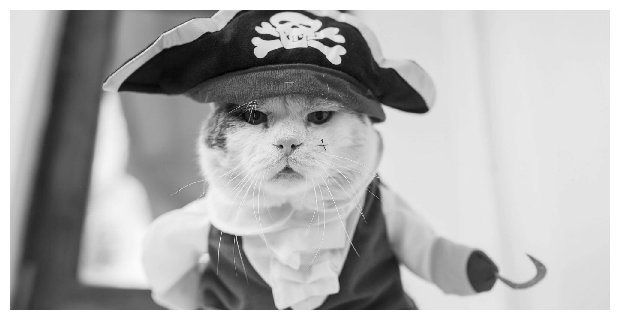

In [5]:
fcp.imshow(img, ax_size=[600, 600])

## Colors

### Color map

We can add any standard color map from matplotlib to an imshow using keyword `cmap`:

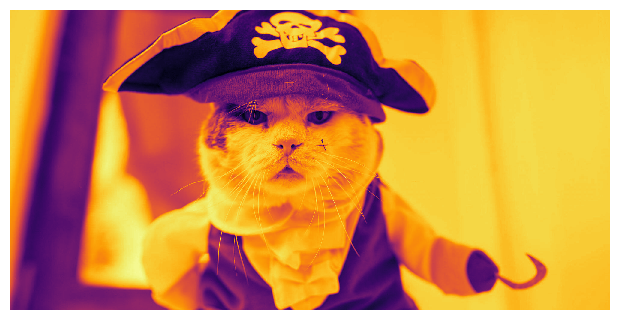

In [6]:
fcp.imshow(img, cmap='inferno', ax_size=[600, 600])

### Colorbar

We can add a colorbar to the image showing the z-range with the keyword ``cbar=True``

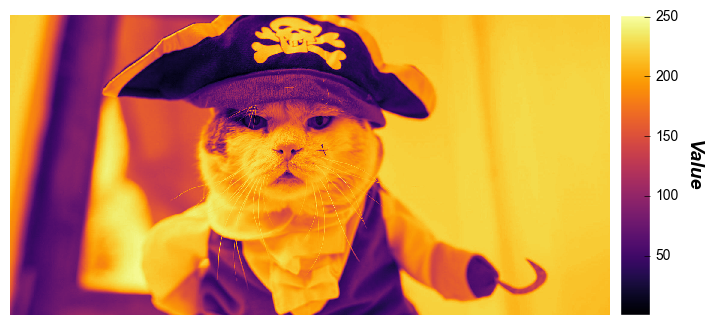

In [7]:
fcp.imshow(img, cmap='inferno', ax_size=[600, 600], cbar=True)

## Zoom

We can zoom in on this stupid kitten by changing the `x` and `y` limits:

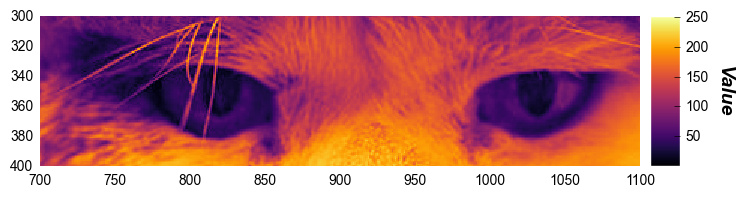

In [8]:
fcp.imshow(img, cmap='inferno', cbar=True, ax_size=[600, 600], xmin=700, xmax=1100, ymin=300, ymax=400, tick_labels_major=True)

<i> private eyes are watching you... </i>

## Contrast stretching

In some cases (such as raw image sensor data analysis) it is helpful to adjust the colormap limits in order to "stretch" the contrast.  This can be done via the `z` axis limits.  In this example, we stretch +/-3 standard deviations from the mean pixel value.

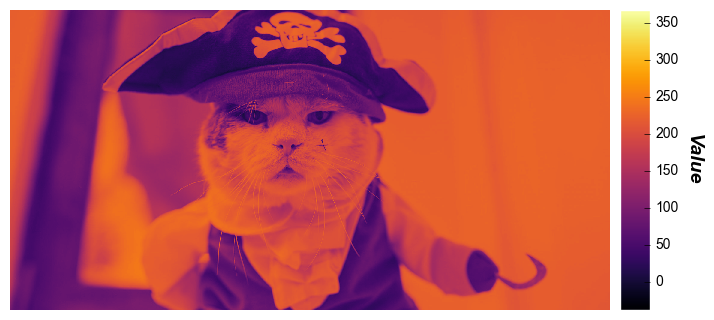

In [9]:
uu = img.stack().mean()
ss = img.stack().std()
fcp.imshow(img, cmap='inferno', cbar=True, ax_size=[600, 600], zmin=uu-3*ss, zmax=uu+3*ss)

imshow plots in <b>fivecentplots</b> also provides a convenient kwarg called `stretch` which calculates a numerical multiplier of the standard deviation above and below the mean to set new z-limits (essentially the same thing as done above manually).  `stretch` can be a single value of std dev which is interpreted as +/- that value or a 2-value list with the lower and higher std deviation respectively.  First, we consider a +/- 4 sigma stretch as above:

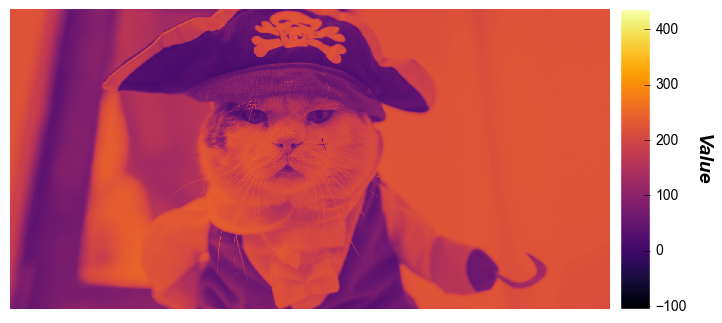

In [10]:
fcp.imshow(img, cmap='inferno', cbar=True, ax_size=[600, 600], stretch=4)

Now we show a single-sided stretch that applies a 3 * std dev increase to the upper z-limit:

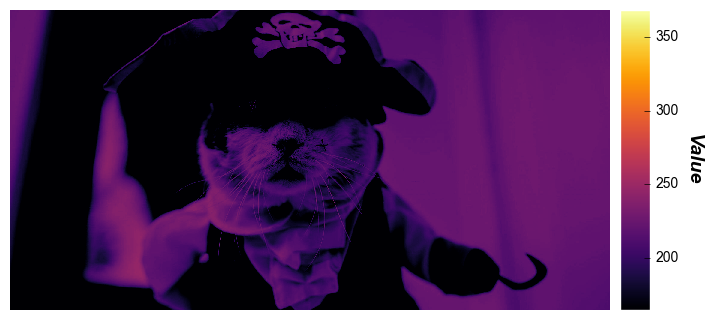

In [11]:
fcp.imshow(img, cmap='inferno', cbar=True, ax_size=[600, 600], stretch=[0, 3])

## Split color planes

When analyzing Bayer-type images, it is often useful to split the image data based on the color-filter array pattern used on the image sensor.  <b>fivecentplots</b> provides a simple utility function to do this and `imshow` can be used to display the result.  Consider the following image:

<img align="left" src="https://upload.wikimedia.org/wikipedia/commons/2/28/RGB_illumination.jpg">

First we read the image from the world-wide web and convert this random RGB image into a Bayer-like image (rough hack for the purposes of this example):

In [12]:
url = 'https://upload.wikimedia.org/wikipedia/commons/2/28/RGB_illumination.jpg'
imgr = imageio.imread(url)
raw = fcp.utilities.rgb2bayer(imgr)
raw

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,47,47,47,48,46,47,45,45,48,46,...,47,103,49,103,48,104,47,96,69,0
1,47,95,47,96,48,85,47,90,46,95,...,102,46,103,51,100,46,100,42,121,0
2,46,46,47,47,47,48,46,48,48,47,...,49,102,47,105,47,102,50,98,73,0
3,47,104,46,113,47,102,48,89,47,101,...,103,47,106,49,102,44,100,44,122,2
4,47,47,48,46,48,48,46,48,48,48,...,47,103,45,107,48,107,48,101,72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,46,48,44,75,0
296,47,47,47,47,47,47,47,47,47,47,...,47,47,48,47,47,47,48,43,77,0
297,47,47,47,47,47,47,47,47,47,47,...,47,47,48,47,47,47,48,43,77,0
298,47,47,47,47,47,47,47,47,47,47,...,47,47,48,47,47,47,48,43,77,0


Now we plot with `imshow` using the keyword `cfa` with an "RGGB" pattern using a wrap-style plot.  Notice that the primary colors from the original image are split into separate subplots.

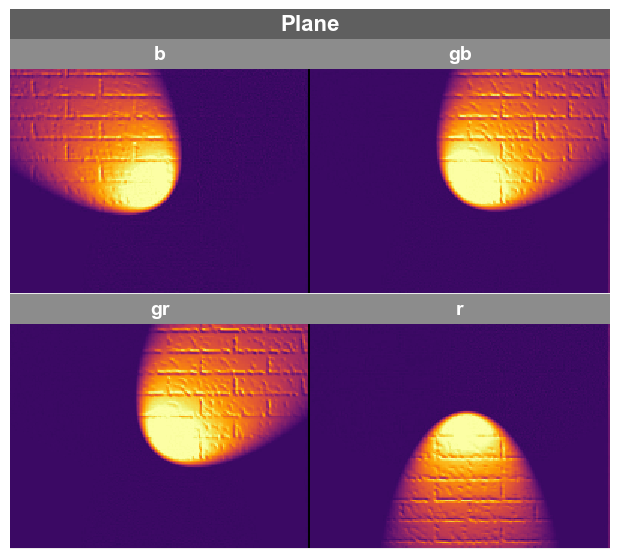

In [13]:
fcp.imshow(raw, cmap='inferno', ax_size=[300, 300], cfa='rggb', wrap='Plane')

## Sneaky input

<div class="admonition note">
<p class="admonition-title"></p>
<p>`imshow` is one of two plot types (`hist` and `imshow`) that allows us to pass a 2D numpy array instead of a `DataFrame`.  When plotting a single image, we don't need column names so we don't technically need a `DataFrame`.  Why do we allow this?  This is a sneaky, under-the-table trick just to make life easier.  Numpy arrays are converted into `DataFrames` behind the scenes so you don't have to take an extra step.  This can be our dirty little secret...</p>
</div>